# <span style="color:red">SpringBoard - Relax Challenge</span>

In [1]:
# import packages

import pandas as pd
import numpy as np

In [2]:
# load data

usage_summary_df = pd.read_csv('takehome_user_engagement.csv')
usage_summary_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


takehome_users.csv is not UTF-8 encoded

data = pd.read_csv('takehome_users.csv', encoding='utf-8') did not work

In [3]:
# load users_df data

users_df = pd.read_csv('takehome_users.csv', encoding='ISO-8859-1')

users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
users_df.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

objet_id and user_id are equivalant

In [5]:
# how many people signed

print('{} users signed up for the application.'.format(len(list(users_df['object_id'].unique()))))

12000 users signed up for the application.


In [6]:
# how many people logged at least one time

print(' {} users logged at least one time.'.format(len(list(usage_summary_df['user_id'].unique()))))

 8823 users logged at least one time.


In [7]:
# how many people never signed

print(' {} users never logged in.'.format(int(len(list(users_df['object_id'].unique()))) 
                  - int(len(list(usage_summary_df['user_id'].unique())))))

 3177 users never logged in.


## <span style="color:red">Investigate Datasets</span>

In [8]:
print("Missing values in usage_summary_df")
print(usage_summary_df.isnull().sum())

Missing values in usage_summary_df
time_stamp    0
user_id       0
visited       0
dtype: int64


In [9]:
print("Missing values in users_df")
print(users_df.isnull().sum())

Missing values in users_df
object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64


we know that users who have never logged in have missing values in the last_session_creation_time column. So we can give a specific value for them in that column

we need to find users who logged 3 times in a 7 day period. To find this we can use usage_summary_df. these users will be called adopted users.

In [10]:
usage_summary_df.head(3)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1


In [11]:
usage_summary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [12]:
usage_summary_df['visited'].unique()

array([1])

In [13]:
# Create a user_id array

user_id = usage_summary_df['user_id'].unique()
user_id

array([    1,     2,     3, ..., 11998, 11999, 12000])

In [14]:
print(type(user_id))
print(len(user_id))

<class 'numpy.ndarray'>
8823


Use time_stamp feature to find adopted users

In [15]:
# Convert time_stamp objet Timestamp

usage_summary_df['time_stamp'] = pd.to_datetime(usage_summary_df['time_stamp'])

In [16]:
usage_summary_df['time_stamp'][0]

Timestamp('2014-04-22 03:53:30')

In [17]:
# Timestamp usage

print(usage_summary_df['time_stamp'][0].year)
print(usage_summary_df['time_stamp'][0].month)
print(usage_summary_df['time_stamp'][0].day)

2014
4
22


In [18]:
import datetime

seven_days = datetime.timedelta(7)
seven_days
seven_days.days

7

In [19]:
# generate adoption_list
# Idea: create sub dataframes for each user than look at their usage for 7 days periods

adoption_list = []

for i in user_id:
    
    df = usage_summary_df[usage_summary_df.user_id == i].reset_index().sort_values(by='time_stamp')
    
    status = False
    
    if len(df) < 3:
        
        pass
    
    else:
        
        for j in range(0, len(df)-2):
            
            time_dif = df.time_stamp[j+2].date() - df.time_stamp[j].date()
            
            if time_dif < datetime.timedelta(7):
                
                status = True
                
            else:
                
                pass
            
    adoption_list.append(status)

In [20]:
adopted_users = pd.DataFrame({'user_id': user_id, 'adopted': adoption_list})
adopted_users.head()

,user_id,adopted
0,1,False
1,2,True
2,3,False
3,4,False
4,5,False


In [21]:
print(len(users_df.object_id.unique()), len(user_id))

12000 8823


## <span style="color:red">Merging</span>

In [22]:
df = users_df.merge(adopted_users, left_on='object_id', right_on='user_id', how='outer')

df.adopted.fillna(False, inplace=True)

df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,3.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,4.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,5.0,False


In [23]:
df.adopted.value_counts()

False    10398
True      1602
Name: adopted, dtype: int64

In [24]:
df.adopted.value_counts(1)

False    0.8665
True     0.1335
Name: adopted, dtype: float64

In [25]:
df.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
user_id                       float64
adopted                          bool
dtype: object

## <span style="color:red">Investigate Features</span>

## <span style="color:blue">*1. email Feature*</span>

In [26]:
df.email.value_counts().head()

MandySchroder@gustr.com         2
PaigeWyatt@gmail.com            2
MimirMKarlsen@jourrapide.com    2
NicolaiSHolm@yahoo.com          2
KlausMueller@gustr.com          2
Name: email, dtype: int64

data wrangling

In [27]:
print(df.email[0])
print(df.email[0].find('@'))
print(df.email[0][df.email[0].find('@')+1:])

AugustCClausen@yahoo.com
14
yahoo.com


In [28]:
# create empty email list

email_domain_list = []

# append domains of each email to email list 

for i in range(0, len(df)):
    
    df.email[i].find('@')
    
    domain = df.email[i].split('@')[1].split('.')[0]
    
    email_domain_list.append(domain)
    
print(len(email_domain_list))

12000


In [29]:
# Add email list as a column to df

df['email_domain'] = email_domain_list

df.head(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted,email_domain
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,False,yahoo
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2.0,True,gustr
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,3.0,False,gustr


In [30]:
df.email_domain.value_counts()[0:10]

gmail         3562
yahoo         2447
jourrapide    1259
cuvox         1202
gustr         1179
hotmail       1165
xvnbr            2
qgjbc            2
dqwln            2
oqpze            2
Name: email_domain, dtype: int64

In [31]:
# Regroup small size email domains as one group 'other'

pd.options.mode.chained_assignment = None

main_domains = ['gmail', 'yahoo', 'jourrapide', 'cuvox', 'gustr', 'hotmail']

df.email_domain[~df.email_domain.isin(main_domains)] = 'others'

In [32]:
df.email_domain.value_counts()

gmail         3562
yahoo         2447
jourrapide    1259
cuvox         1202
others        1186
gustr         1179
hotmail       1165
Name: email_domain, dtype: int64

In [33]:
# Plot adopted users among their emails

# import packages
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='email_domain', hue='adopted', data=df)

plt.title('Adopted Status by Email Domain')

plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

## <span style="color:blue">*2. creation_source Feature*</span>

In [34]:
df.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

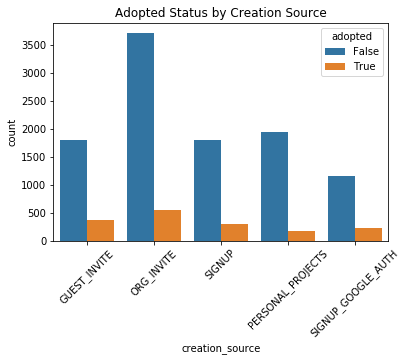

In [35]:
sns.countplot(x='creation_source', hue='adopted', data=df)
plt.title('Adopted Status by Creation Source')
plt.xticks(rotation=45)

## <span style="color:blue">*3. opted_in_to_mailing_list Feature*</span>

In [36]:
df.opted_in_to_mailing_list.value_counts()

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64

Text(0.5, 1.0, 'Adopted Status by Mailing List Opt-in')

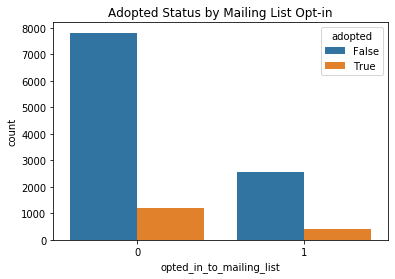

In [37]:
sns.countplot(x='opted_in_to_mailing_list', hue='adopted', data=df)
plt.title('Adopted Status by Mailing List Opt-in')

## <span style="color:blue">*4. enabled_for_marketing_drip Feature*</span>

In [38]:
df.enabled_for_marketing_drip.value_counts()

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64

Text(0.5, 1.0, 'Adopted Status by Marketing Drip Status')

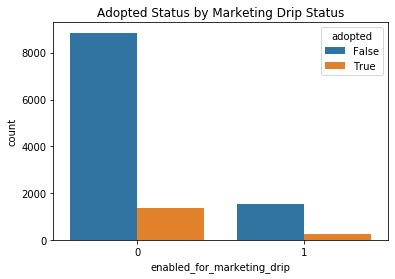

In [39]:
sns.countplot(x='enabled_for_marketing_drip', hue='adopted', data=df)
plt.title('Adopted Status by Marketing Drip Status')

## <span style="color:blue">*5. org_id Feature*</span>

In [40]:
df.org_id.value_counts().head(20)

0     319
1     233
2     201
3     168
4     159
6     138
5     128
9     124
7     119
10    104
8      97
14     87
11     75
12     75
17     74
18     73
13     72
16     72
20     68
15     64
Name: org_id, dtype: int64

In [41]:
# Regroup org_id

main_org = [0, 1, 2, 3, 4, 5, 6, 7, 9, 10]

df.org_id[df.org_id.isin(main_org)] = 'major'

df.org_id[df.org_id != 'major'] = 'minor'

Text(0.5, 1.0, 'Adopted Status by Organization')

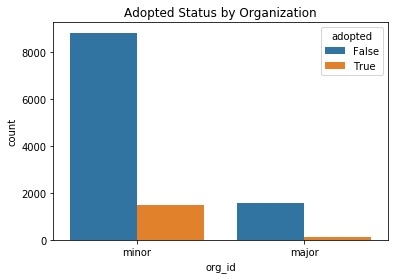

In [42]:
sns.countplot(x='org_id', hue='adopted', data=df)
plt.title('Adopted Status by Organization')

## <span style="color:blue">*6. last_session_creation_time Feature*</span>

In [43]:
df.last_session_creation_time.head(3)

0    1.398139e+09
1    1.396238e+09
2    1.363735e+09
Name: last_session_creation_time, dtype: float64

In [44]:
LSCT = pd.to_datetime(users_df.last_session_creation_time, unit='s')
print(type(LSCT[0]))
LSCT.head(3)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


0   2014-04-22 03:53:30
1   2014-03-31 03:45:04
2   2013-03-19 23:14:52
Name: last_session_creation_time, dtype: datetime64[ns]

In [45]:
CT = pd.to_datetime(users_df.creation_time)

In [46]:
CT.head(3)

0   2014-04-22 03:53:30
1   2013-11-15 03:45:04
2   2013-03-19 23:14:52
Name: creation_time, dtype: datetime64[ns]

In [47]:
time_difference = (LSCT - CT).apply(lambda x: x.days)

print(type(time_difference))
time_difference.head()

<class 'pandas.core.series.Series'>


0      0.0
1    136.0
2      0.0
3      1.0
4      5.0
dtype: float64

In [48]:
df['days_since_signup'] = time_difference

df['days_since_signup'].head()

0      0.0
1    136.0
2      0.0
3      1.0
4      5.0
Name: days_since_signup, dtype: float64

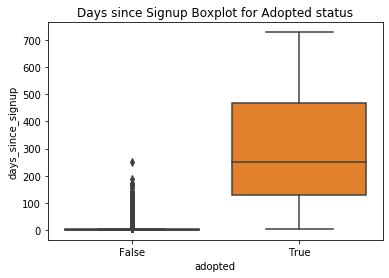

In [49]:
plt.title('Days since Signup Boxplot for Adopted status')
sns.boxplot(y='days_since_signup', x='adopted', data=df)

## <span style="color:blue">*7. invited_by_user_id Feature*</span>

In [50]:
df.invited_by_user_id.value_counts().head()

10741.0    13
2527.0     12
2308.0     11
1525.0     11
11770.0    11
Name: invited_by_user_id, dtype: int64

It might be useful if we know howmany times a user invite other users

In [51]:
invite_times = pd.DataFrame(users_df.invited_by_user_id.value_counts()).reset_index()
invite_times.columns = ['id', 'invite_times']

In [52]:
df = df.merge(invite_times, left_on='object_id', right_on='id', how='outer')
df.head(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted,email_domain,days_since_signup,id,invite_times
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,minor,10803.0,1.0,False,yahoo,0.0,NaN,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,major,316.0,2.0,True,gustr,136.0,NaN,NaN
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,minor,1525.0,3.0,False,gustr,0.0,3.0,1.0


In [53]:
df.invite_times.fillna(0, inplace=True)
df.head(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted,email_domain,days_since_signup,id,invite_times
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,minor,10803.0,1.0,False,yahoo,0.0,NaN,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,major,316.0,2.0,True,gustr,136.0,NaN,0.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,minor,1525.0,3.0,False,gustr,0.0,3.0,1.0


Text(0.5, 1.0, 'Days since Signup Boxplot for Adopted status')

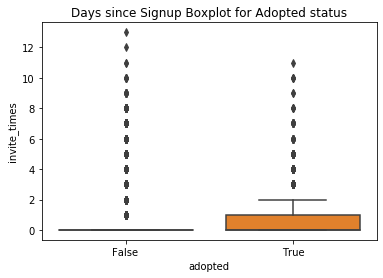

In [54]:
sns.boxplot(y='invite_times', x='adopted', data=df)
plt.title('Days since Signup Boxplot for Adopted status')

### <span style="color:red">Drop Columns</span>

In [55]:
#df.drop(['creation_time', 'name', 'last_session_creation_time', 'invited_by_user_id', 'id'], axis=1, inplace=True)

In [56]:
df.drop(['email'], axis=1, inplace=True)

In [57]:
df.head()

,object_id,creation_time,name,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted,email_domain,days_since_signup,id,invite_times
0,1,2014-04-22 03:53:30,Clausen August,GUEST_INVITE,1.398139e+09,1,0,minor,10803.0,1.0,False,yahoo,0.0,NaN,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,ORG_INVITE,1.396238e+09,0,0,major,316.0,2.0,True,gustr,136.0,NaN,0.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,ORG_INVITE,1.363735e+09,0,0,minor,1525.0,3.0,False,gustr,0.0,3.0,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,GUEST_INVITE,1.369210e+09,0,0,major,5151.0,4.0,False,yahoo,1.0,NaN,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GUEST_INVITE,1.358850e+09,0,0,minor,5240.0,5.0,False,yahoo,5.0,NaN,0.0


### <span style="color:red">Fill null values with 0</span>

In [58]:
# Fill null values with 0

df.days_since_signup.fillna(0, inplace=True)

df.opted_in_to_mailing_list.fillna(0, inplace=True)

df.enabled_for_marketing_drip.fillna(0, inplace=True)

## <span style="color:red">Machine Learning</span>

## <span style="color:red">Get Dummies</span>

In [59]:
email_domain = pd.get_dummies(df.email_domain, drop_first=True)

creation_source = pd.get_dummies(df.creation_source, drop_first=True)

org_id = pd.get_dummies(df.org_id, drop_first=True)

adopted = df.adopted.astype(int)

In [60]:
print(type(email_domain))
print(type(creation_source))
print(type(org_id))
print(type(adopted))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [61]:
email_domain.columns

Index(['gmail', 'gustr', 'hotmail', 'jourrapide', 'others', 'yahoo'], dtype='object')

In [62]:
creation_source.columns

Index(['ORG_INVITE', 'PERSONAL_PROJECTS', 'SIGNUP', 'SIGNUP_GOOGLE_AUTH'], dtype='object')

In [63]:
org_id.columns

Index(['minor'], dtype='object')

In [64]:
opted_in_to_mailing_list = df.opted_in_to_mailing_list

enabled_for_marketing_drip = df.enabled_for_marketing_drip

days_since_signup = df.days_since_signup

invite_times = df.invite_times

In [65]:
data_df = pd.concat([email_domain, creation_source, opted_in_to_mailing_list, enabled_for_marketing_drip, 
                     org_id, days_since_signup, invite_times, adopted], axis=1)
data_df.head()

,gmail,gustr,hotmail,jourrapide,others,yahoo,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,opted_in_to_mailing_list,enabled_for_marketing_drip,minor,days_since_signup,invite_times,adopted
0,0,0,0,0,0,1,0,0,0,0,1,0,1,0.0,0.0,0
1,0,1,0,0,0,0,1,0,0,0,0,0,0,136.0,0.0,1
2,0,1,0,0,0,0,1,0,0,0,0,0,1,0.0,1.0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,1.0,0.0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,1,5.0,0.0,0


In [66]:
data_df.dtypes

gmail                           uint8
gustr                           uint8
hotmail                         uint8
jourrapide                      uint8
others                          uint8
yahoo                           uint8
ORG_INVITE                      uint8
PERSONAL_PROJECTS               uint8
SIGNUP                          uint8
SIGNUP_GOOGLE_AUTH              uint8
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
minor                           uint8
days_since_signup             float64
invite_times                  float64
adopted                         int64
dtype: object

## <span style="color:red">Import packages</span>

In [67]:
# Import packages

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

## <span style="color:red">Splitting Data</span>

In [68]:
# Split data

X = np.array(data_df.drop('adopted', axis=1))

y = np.array(data_df.adopted)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

## <span style="color:red">Normalize Data</span>

In [69]:
# Normalize Data

scaler = StandardScaler()

scaler.fit(X_train) # use train data to fit

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

## <span style="color:red">Use Gridsearch to Tune Parameters</span>

In [70]:
model = LogisticRegression(class_weight='balanced')

parameters = {'C':[0.001, 0.01, 0.1], 'tol':[1e-5, 1e-4, 0.001]}

clf = GridSearchCV(model, parameters, cv=5, scoring='accuracy')

clf.fit(X_train, y_train)

clf.best_params_, clf.cv_results_['params'], clf.cv_results_['mean_test_score']

/Users/Murat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Murat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Murat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Murat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Murat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

/Users/Murat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Murat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


({'C': 0.01, 'tol': 1e-05},
 [{'C': 0.001, 'tol': 1e-05},
  {'C': 0.001, 'tol': 0.0001},
  {'C': 0.001, 'tol': 0.001},
  {'C': 0.01, 'tol': 1e-05},
  {'C': 0.01, 'tol': 0.0001},
  {'C': 0.01, 'tol': 0.001},
  {'C': 0.1, 'tol': 1e-05},
  {'C': 0.1, 'tol': 0.0001},
  {'C': 0.1, 'tol': 0.001}],
 array([0.9740625 , 0.9740625 , 0.9740625 , 0.97520833, 0.97520833,
        0.97520833, 0.970625  , 0.970625  , 0.970625  ]))

In [71]:
model = LogisticRegression(C=0.01, class_weight='balanced')

model.fit(X_train, y_train)

print(classification_report(y_true=y_test, y_pred=model.predict(X_test), target_names=['no', 'yes']))

              precision    recall  f1-score   support

          no       0.98      0.99      0.98      2069
         yes       0.93      0.85      0.89       331

    accuracy                           0.97      2400
   macro avg       0.95      0.92      0.94      2400
weighted avg       0.97      0.97      0.97      2400



/Users/Murat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [72]:
# Present features sorted by their corresponding coefficients

features = pd.DataFrame(data_df.columns[:-1], columns=['features'])

coefficients = pd.DataFrame(abs(model.coef_)).unstack().unstack()

results = pd.concat([features, coefficients], axis=1)

results.columns = ['features', 'coefficients']

results.sort_values(by='coefficients', ascending=False)

,features,coefficients
13,days_since_signup,3.315403
12,minor,0.154196
7,PERSONAL_PROJECTS,0.150567
0,gmail,0.142900
14,invite_times,0.110965
8,SIGNUP,0.048076
3,jourrapide,0.047889
6,ORG_INVITE,0.043892
9,SIGNUP_GOOGLE_AUTH,0.039242
2,hotmail,0.036254


## <span style="color:red">Prediction of Adopted Users</span>

From this table we can see that the most important feature is the time since signup

second important feature is users's organization.

The most important third one is creation source most adopted users' source is personal projects

fourth one is users registration email, most adopted users'registration email is gmail

fifth one is invitation time, adopted users mostly invite other users